<a href="https://colab.research.google.com/github/arashakbari1234/Data-Mining/blob/main/exercise%202_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('./drive/MyDrive/Data Mining Course - Exercises/Maternal Health Risk Data Set.csv')

In [ ]:
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
# data_dup = df.duplicated().any()
# data_dup

In [ ]:
# df = df.drop_duplicates()

In [ ]:
# data_dup = df.duplicated().any()
# data_dup

In [ ]:
# df['RiskLevel'].value_counts()

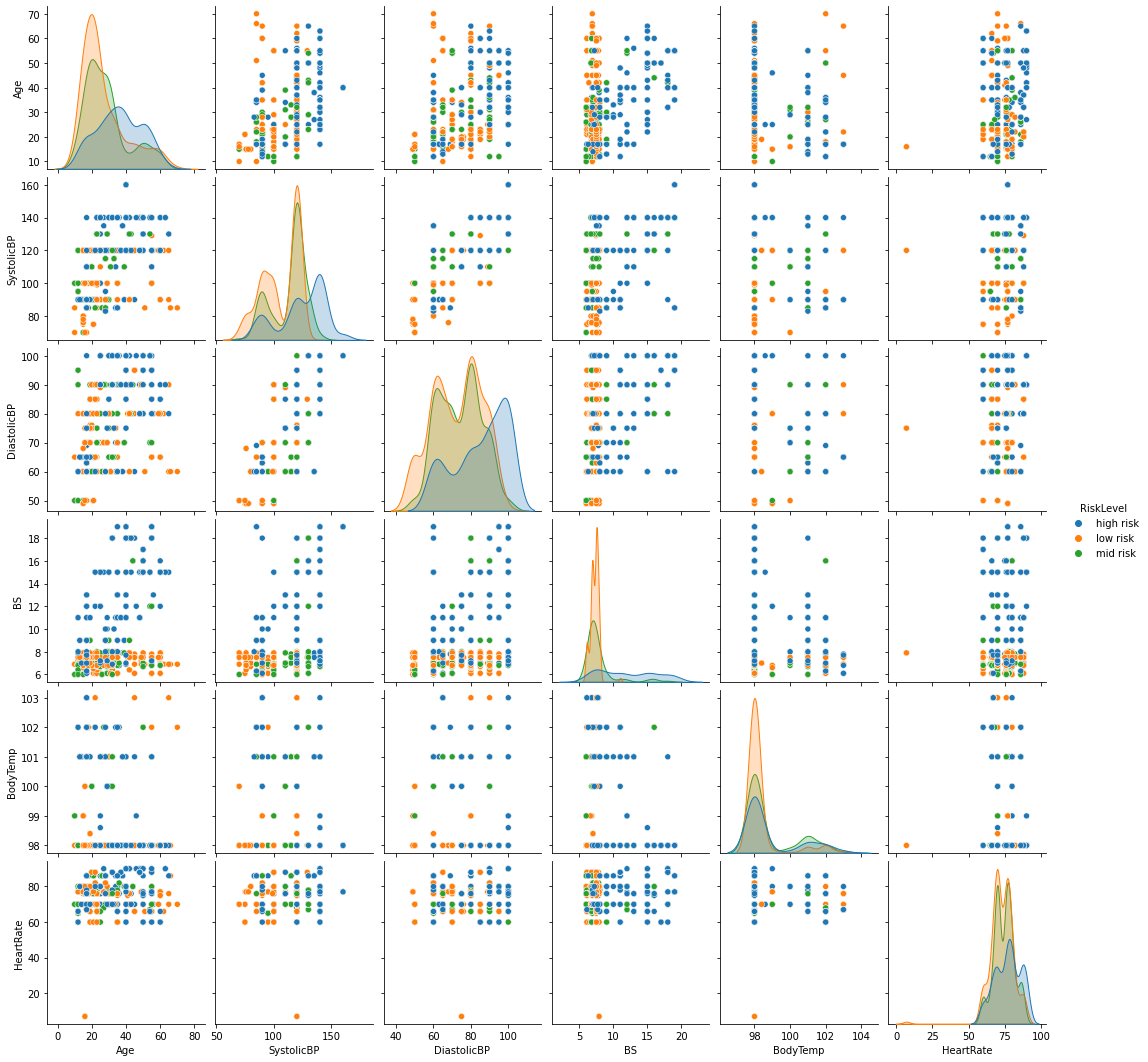

In [ ]:
sns.pairplot(df, hue='RiskLevel')

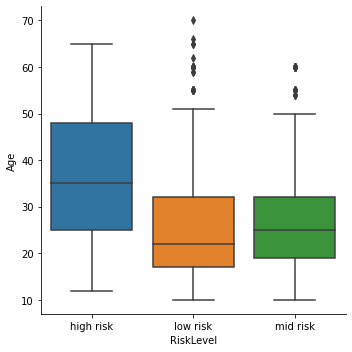

In [ ]:
sns.catplot(x='RiskLevel',y='Age',data=df, kind='box')

In [ ]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
lb_make = LabelEncoder()
y = lb_make.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## KNN

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_X_train, y_train)

y_pred = knn_model.predict(scaled_X_test)


In [ ]:
confusion_matrix(y_test, y_pred)

array([[65,  7,  4],
       [ 4, 95, 18],
       [ 8, 26, 78]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        76
           1       0.74      0.81      0.78       117
           2       0.78      0.70      0.74       112

    accuracy                           0.78       305
   macro avg       0.79      0.79      0.79       305
weighted avg       0.78      0.78      0.78       305



In [ ]:
df['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
test_error_rates = []

for k in range(1, 100):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_X_train, y_train)

  y_pred_test = knn_model.predict(scaled_X_test)

  test_error = 1-accuracy_score(y_test, y_pred_test)

  test_error_rates.append(test_error)

In [ ]:
# test_error_rates

Text(0.5, 0, 'K Neighbors')

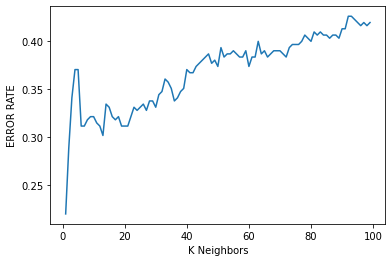

In [ ]:
plt.plot(range(1,100), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [ ]:
# PIPELINE --> GRIDSEARCH CV

In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
operations = [('scaler',scaler), ('knn',knn)]
pipe = Pipeline(operations)
k_values = list(range(1,50))
param_grid = {'knn__n_neighbors':k_values, 'knn__metric':['euclidean','manhattan'],
              'knn__weights':['uniform','distance']}

full_cv_classifier = GridSearchCV(pipe, param_grid, cv=8, scoring='accuracy')

full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(metric='manhattan', n_neighbors=42, weights='distance'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'manhattan',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 42,
 'knn__p': 2,
 'knn__weights': 'distance',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn',
   KNeighborsClassifier(metric='manhattan', n_neighbors=42, weights='distance'))],
 'verbose': False}

In [ ]:
full_pred = full_cv_classifier.predict(X_test)
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.78      0.78      0.78       117
           2       0.75      0.77      0.76       112

    accuracy                           0.79       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.79      0.79      0.79       305



In [ ]:
print("Train accuracy:",full_cv_classifier.score(X_train,y_train))
print("Test accuracy:",full_cv_classifier.score(X_test,y_test))

Train accuracy: 0.9464033850493653
Test accuracy: 0.7901639344262295


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


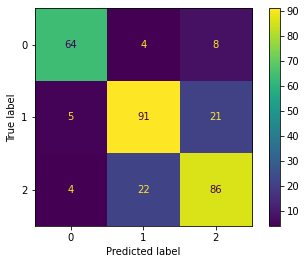

In [ ]:
plot_confusion_matrix(full_cv_classifier, X_test, y_test)

## Random Forrest

In [ ]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
lb_make = LabelEncoder()
y = lb_make.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_estimators = [64,100,128,200]
max_features = [2,3,4,6]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'oob_score':oob_score}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4, 6],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid.best_params_

{'max_features': 3, 'n_estimators': 200, 'oob_score': False}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[29,  3,  2],
       [ 2, 57, 10],
       [ 4, 17, 12]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 0.9430379746835443
Test accuracy: 0.7205882352941176


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


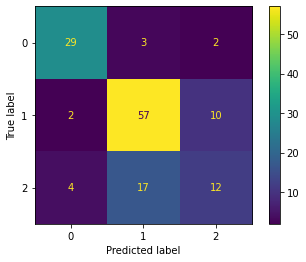

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.74      0.83      0.78        69
           2       0.50      0.36      0.42        33

    accuracy                           0.72       136
   macro avg       0.69      0.68      0.68       136
weighted avg       0.70      0.72      0.71       136



## Decision tree

In [ ]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
lb_make = LabelEncoder()
y = lb_make.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,4,5,6]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6]})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[28,  2,  4],
       [ 0, 63,  6],
       [ 4, 20,  9]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 0.7531645569620253
Test accuracy: 0.7352941176470589


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


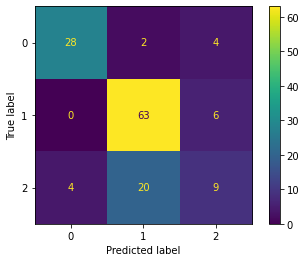

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.74      0.91      0.82        69
           2       0.47      0.27      0.35        33

    accuracy                           0.74       136
   macro avg       0.70      0.67      0.67       136
weighted avg       0.71      0.74      0.71       136



## SVM

In [ ]:
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
lb_make = LabelEncoder()
y = lb_make.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.2,0.5,1], 'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'], 'degree':[2,3,4]}
svm = SVC()
grid = GridSearchCV(svm,param_grid)
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
grid_preds = grid.predict(scaled_X_test)

In [ ]:
confusion_matrix(y_test, grid_preds)

array([[26,  4,  2],
       [ 2, 61,  2],
       [ 7, 29,  3]])

In [ ]:
print("Train accuracy:",grid.score(scaled_X_train,y_train))
print("Test accuracy:",grid.score(scaled_X_test,y_test))

Train accuracy: 0.7341772151898734
Test accuracy: 0.6617647058823529


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


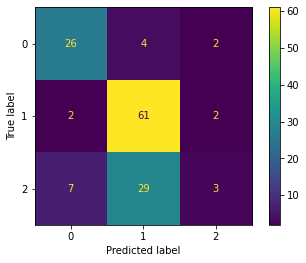

In [ ]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [ ]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.65      0.94      0.77        65
           2       0.43      0.08      0.13        39

    accuracy                           0.66       136
   macro avg       0.61      0.61      0.56       136
weighted avg       0.61      0.66      0.59       136

